In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.tsa.seasonal import STL
from pylab import rcParams
import pandas as pd
from platform import python_version

Configure Settings

In [74]:
rcParams['figure.figsize'] = (10, 6) 
sns.set_theme(palette='muted', style='whitegrid')

In [75]:
df = pd.read_csv('PJME_hourly.csv')
print(df.shape)
print(df.dtypes)
df.head()

(145366, 2)
Datetime     object
PJME_MW     float64
dtype: object


,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [76]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Columns: 2 entries, Datetime to PJME_MW
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [77]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [78]:
df.isnull().any()

Datetime    False
PJME_MW     False
dtype: bool

To review the Datetime column we need to make sure the contents are in the proper datetime format.

In [79]:
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

In [80]:
df['Datetime'].describe(datetime_is_numeric=True)

count                           145366
mean     2010-04-18 03:25:25.999202048
min                2002-01-01 01:00:00
25%                2006-02-23 14:15:00
50%                2010-04-18 04:30:00
75%                2014-06-10 18:45:00
max                2018-08-03 00:00:00
Name: Datetime, dtype: object

Time Plot

<AxesSubplot:title={'center':'Electric power - daily'}, xlabel='Datetime', ylabel='PJME_MW'>

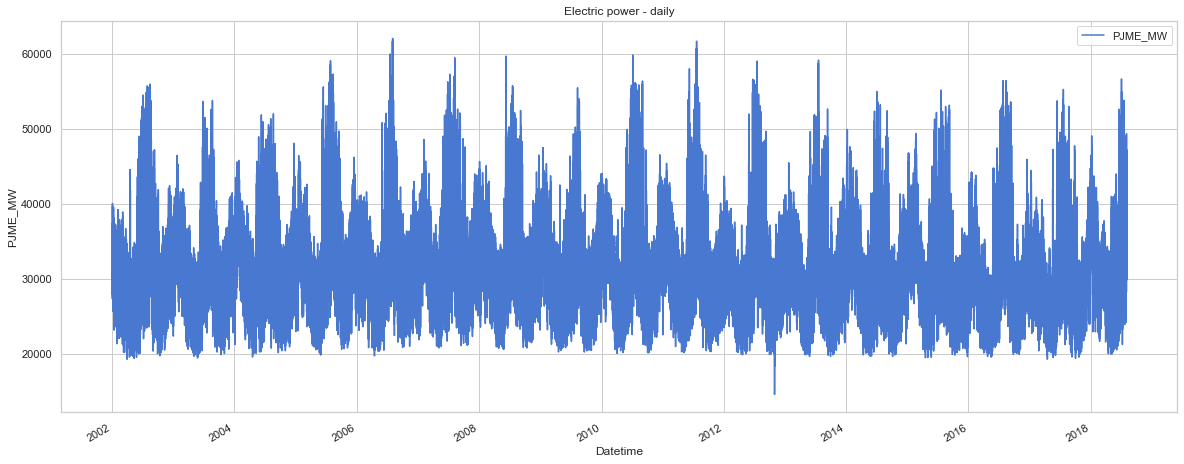

In [83]:
df.plot('Datetime', 'PJME_MW', figsize = (20, 8), xlabel = 'Datetime', ylabel = 'PJME_MW', title = 'Electric power - daily')

In [84]:
data = pd.read_csv("Minor2-Project-Dataset.csv")

In [85]:
data.head()

,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,PJME_MW
0,2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
1,2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2,2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
3,2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
4,2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0



We will add a QUARTER column to our timeseries dataframe. This will help with seasonal plotting later on.

In [86]:
df['quarter'] = data['quarter']

In [87]:
df.head()

,Datetime,PJME_MW,quarter
0,2002-12-31 01:00:00,26498.0,4
1,2002-12-31 02:00:00,25147.0,4
2,2002-12-31 03:00:00,24574.0,4
3,2002-12-31 04:00:00,24393.0,4
4,2002-12-31 05:00:00,24860.0,4


Since we'll be looking at seasonality we can use resampling to convert the timeseries to an average monthly format. This will also make visual interpretation easier.

In [88]:
# Convert dataframe to average monthly format
df = df.resample('M', on='Datetime').mean().rename(columns={'PJME_MW':'MONTHLY_AVG'})
df['quarter'] = df['quarter'].astype(int)
df.head()

,MONTHLY_AVG,quarter
Datetime,,
2002-01-31,31075.399731,1
2002-02-28,30239.166667,1
2002-03-31,28875.256720,1
2002-04-30,28534.731572,2
2002-05-31,28073.653226,2


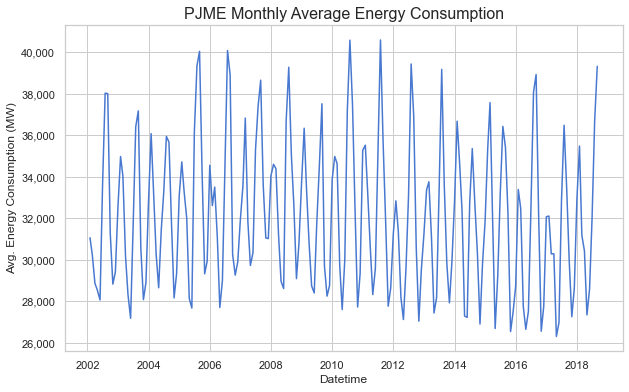

In [92]:
ax = sns.lineplot(data=df, x='Datetime', y='MONTHLY_AVG')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Datetime')
plt.ylabel('Avg. Energy Consumption (MW)')
plt.title('PJME Monthly Average Energy Consumption', fontsize=16)
plt.show()

Lag Plot

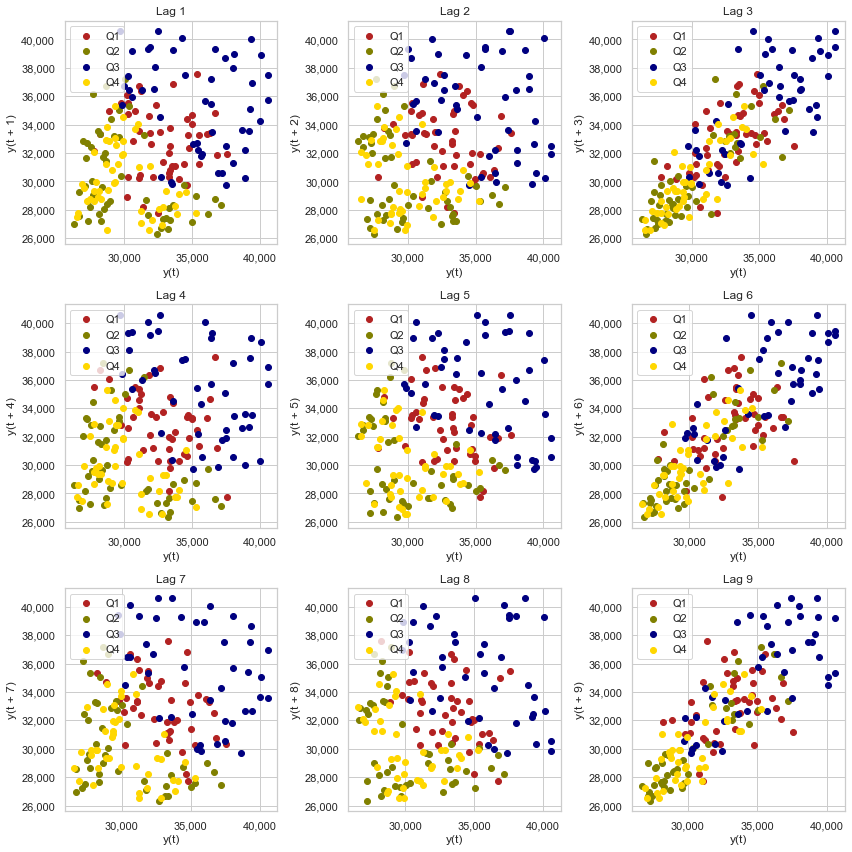

In [93]:
plt.figure(figsize=(12,12))

for i in range(1, 10):
    ax=plt.subplot(3, 3, i)
    # Create a lag plot for each quarter
    pd.plotting.lag_plot(df.loc[df['quarter'] == 1, 'MONTHLY_AVG'], lag=i, c='firebrick', label='Q1')    
    pd.plotting.lag_plot(df.loc[df['quarter'] == 2, 'MONTHLY_AVG'], lag=i, c='olive', label='Q2')
    pd.plotting.lag_plot(df.loc[df['quarter'] == 3, 'MONTHLY_AVG'], lag=i, c='navy', label='Q3')
    pd.plotting.lag_plot(df.loc[df['quarter'] == 4, 'MONTHLY_AVG'], lag=i, c='gold', label='Q4')
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.legend()
    plt.title(f'Lag {i}')

plt.tight_layout()
plt.show()

Autocorrelation plot

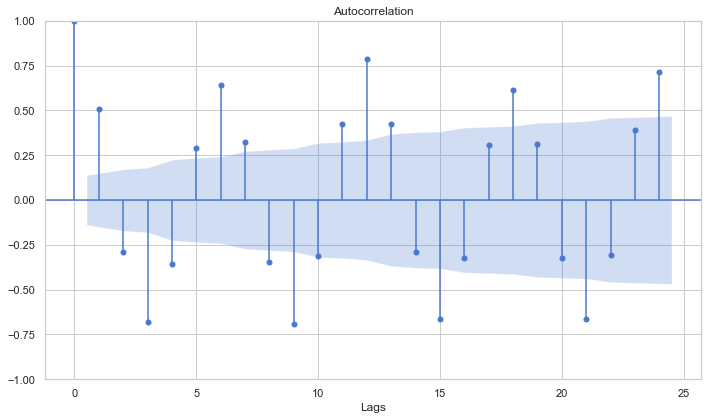

In [94]:
# Select a multiple of the seasonal frequency for the number of lags
plot_acf(df['MONTHLY_AVG'])
plt.xlabel('Lags')
plt.tight_layout()
plt.show()

Partial Autocorrelation plot

c:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


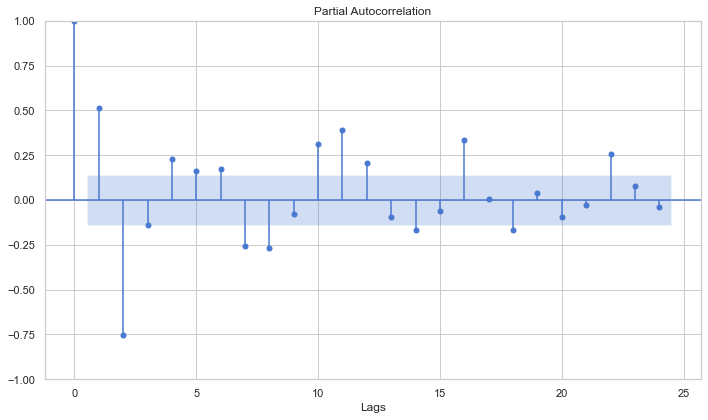

In [95]:
plot_pacf(df['MONTHLY_AVG'])
plt.xlabel('Lags')
plt.tight_layout()
plt.show()

Time Series Differencing

In [96]:
diff = df['MONTHLY_AVG'].diff(1).dropna()
diff.head()

Datetime
2002-02-28    -836.233064
2002-03-31   -1363.909946
2002-04-30    -340.525149
2002-05-31    -461.078346
2002-06-30    5512.266219
Freq: M, Name: MONTHLY_AVG, dtype: float64

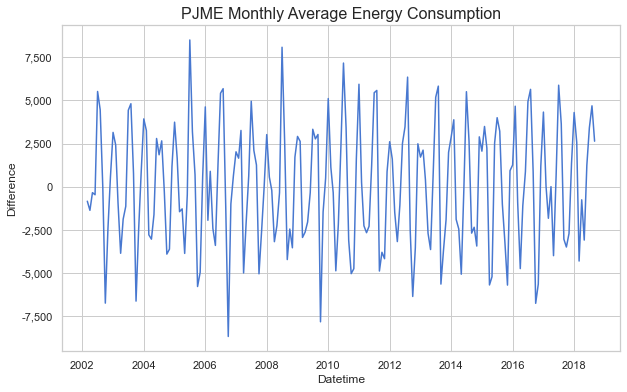

In [97]:
ax = sns.lineplot(data=diff)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Datetime')
plt.ylabel('Difference')
plt.title('PJME Monthly Average Energy Consumption', fontsize=16)
plt.show()

Kwiatkowski-Phillips-Schmidt-Shin Test

In [98]:
def kpss_test(timeseries):
    # Create a metrics table for kpss test
    print('KPSS Metrics:')    
    kpsstest = kpss(timeseries, regression='c', nlags='auto')
    kpss_output = pd.Series(
        kpsstest[0:3], 
        index = ['Test Statistic', 
               'p-Value', 
               'Number of Lags'
        ]
    )
    
    for key, value in kpsstest[3].items():
        kpss_output[f'Critical Value ({key})'] = value
    
    return kpss_output

In [99]:
kpss_test(diff)

KPSS Metrics:


c:\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Test Statistic            0.099818
p-Value                   0.100000
Number of Lags           27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

 Augmented Dickey-Fuller Test

In [100]:
def adf_test(timeseries):
    # Create a metrics table for adf test
    print('Dickey-Fuller Metrics:')    
    adftest = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(
        adftest[0:4],
        index = [
            'Test Statistic',
            'p-Value',
            'Number of Lags',
            'Number of Observations'
        ]
    )
    
    for key, value in adftest[4].items():
        adfoutput[f'Critical Value ({key})'] = value
    
    return adfoutput

In [101]:
adf_test(diff)

Dickey-Fuller Metrics:


Test Statistic           -6.098900e+00
p-Value                   9.945211e-08
Number of Lags            1.400000e+01
Number of Observations    1.840000e+02
Critical Value (1%)      -3.466398e+00
Critical Value (5%)      -2.877380e+00
Critical Value (10%)     -2.575214e+00
dtype: float64

Seasonal plot

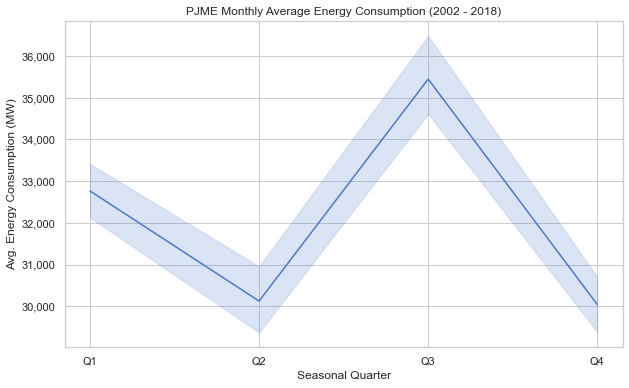

In [102]:
fig, ax = plt.subplots()
sns.lineplot(ax=ax, data=df, x='quarter', y='MONTHLY_AVG', ci=95)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax.set_ylabel('Avg. Energy Consumption (MW)')
ax.set_xlabel('Seasonal Quarter')
ax.set_title('PJME Monthly Average Energy Consumption (2002 - 2018)')
plt.show()

Month plot

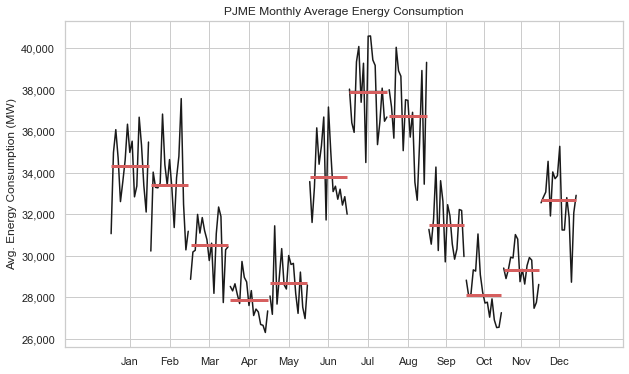

In [103]:
fig, ax = plt.subplots()
month_plot(df['MONTHLY_AVG'], ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('PJME Monthly Average Energy Consumption')
plt.ylabel('Avg. Energy Consumption (MW)')
plt.show()

Seasonal moving average 

In [104]:
# Create a 3 month moving average
df['MOVING_AVG'] = df['MONTHLY_AVG'].rolling(3, min_periods=3).mean()
df.head(12)

,MONTHLY_AVG,quarter,MOVING_AVG
Datetime,,,
2002-01-31,31075.399731,1,NaN
2002-02-28,30239.166667,1,NaN
2002-03-31,28875.256720,1,30063.274373
2002-04-30,28534.731572,2,29216.384986
2002-05-31,28073.653226,2,28494.547173
2002-06-30,33585.919444,2,30064.768081
2002-07-31,38041.896505,3,33233.823059
2002-08-31,38014.021505,3,36547.279152
2002-09-30,31281.468056,3,35779.128689


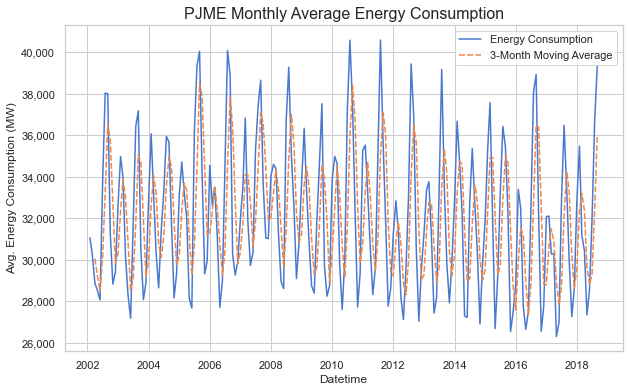

In [105]:
fig, ax = plt.subplots()
sns.lineplot(data=df[['MONTHLY_AVG', 'MOVING_AVG']])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Datetime')
plt.ylabel('Avg. Energy Consumption (MW)')
plt.legend(labels=['Energy Consumption', '3-Month Moving Average'])
plt.title('PJME Monthly Average Energy Consumption', fontsize=16)
plt.show()

Seasonal Trend Decomposition using Loess

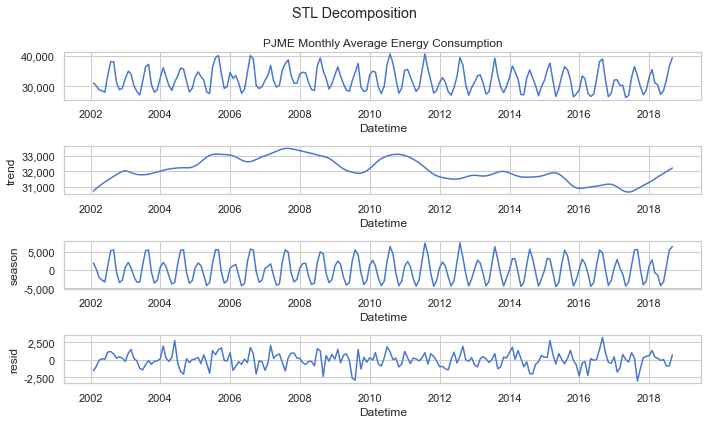

In [106]:
# Decompose the timeseries data
res = STL(df['MONTHLY_AVG'], period=12).fit()

# Create plots for each STL component
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)

plt.suptitle('STL Decomposition')

sns.lineplot(data=df['MONTHLY_AVG'], ax=ax1)
ax1.set_title('PJME Monthly Average Energy Consumption')
ax1.set_ylabel('')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

sns.lineplot(data=res.trend, ax=ax2)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

sns.lineplot(data=res.seasonal, ax=ax3)
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

sns.lineplot(data=res.resid, ax=ax4)
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()